In [1]:
import sys
if "../.." not in sys.path:
    sys.path.append("../..")
    
%load_ext autoreload
%autoreload 2

import clusterizer
import matplotlib.pyplot as plt

# Nodig om een np.datetime64 tijdstip (zoals in de partial_discharges DataFrame) 
# als ascoordinaat te gebruiken.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Hogere DPI voor plotjes (is mooi)
%config InlineBackend.figure_format = 'retina'
# Standaard grootte van plotjes in inches
plt.rcParams['figure.figsize'] = [8, 5]

import pandas as pd
import numpy as np

Git root path found at: C:\Users\sebas\Documents\GitHub\SCG-analyse
Using data path:        C:\Users\sebas\Documents\GitHub\SCG-analyse\data\origineel


# Globals testings

In [2]:
import clusterizer.globals as glob

#runt die globals automatisch als je clusterizer importeert?
#Of alleen als je om datadir vraag?, want datadir is gewoon een variabele toch?

glob.datadir

WindowsPath('C:/Users/sebas/Documents/GitHub/SCG-analyse/data/origineel')

In [3]:
glob.available_circuits


[2145, 3010, 2979, 2980, 1512, 2063, 2870, 2806]

In [4]:
glob.current_path

WindowsPath('C:/Users/sebas/Documents/GitHub/SCG-analyse/notebooks/Scripts Sebas')

In [5]:
glob.git_path

WindowsPath('C:/Users/sebas/Documents/GitHub/SCG-analyse')

In [6]:
glob.data_path

WindowsPath('C:/Users/sebas/Documents/GitHub/SCG-analyse/data/origineel')

In [7]:
glob.datadumpdir

WindowsPath('C:/Users/sebas/Documents/GitHub/SCG-analyse/data/origineel/datadumps/Datadump-server')

In [8]:
glob.partial_discharges

{1512, 2063, 2145, 2806, 2870, 2979, 2980, 3010}

In [9]:
glob.Path

pathlib.Path

In [10]:
glob.circuitcache

WindowsPath('C:/Users/sebas/Documents/GitHub/SCG-analyse/data/origineel/datadumps/cache/circuits')

In [11]:
glob.data_file_paths

[WindowsPath('C:/Users/sebas/Documents/GitHub/SCG-analyse/data/origineel/1512-cableconfig.csv'),
 WindowsPath('C:/Users/sebas/Documents/GitHub/SCG-analyse/data/origineel/1512-pd.csv'),
 WindowsPath('C:/Users/sebas/Documents/GitHub/SCG-analyse/data/origineel/1512-warning.csv'),
 WindowsPath('C:/Users/sebas/Documents/GitHub/SCG-analyse/data/origineel/2063-cableconfig.csv'),
 WindowsPath('C:/Users/sebas/Documents/GitHub/SCG-analyse/data/origineel/2063-pd.csv'),
 WindowsPath('C:/Users/sebas/Documents/GitHub/SCG-analyse/data/origineel/2063-warning.csv'),
 WindowsPath('C:/Users/sebas/Documents/GitHub/SCG-analyse/data/origineel/2145-cableconfig.csv'),
 WindowsPath('C:/Users/sebas/Documents/GitHub/SCG-analyse/data/origineel/2145-pd.csv'),
 WindowsPath('C:/Users/sebas/Documents/GitHub/SCG-analyse/data/origineel/2145-warning.csv'),
 WindowsPath('C:/Users/sebas/Documents/GitHub/SCG-analyse/data/origineel/2806-cableconfig.csv'),
 WindowsPath('C:/Users/sebas/Documents/GitHub/SCG-analyse/data/origin

In [12]:
glob.circuitnum_from_file_path(glob.data_file_paths[5])

2063

In [13]:
#Name geeft naam van bestand als string?
#en split geeft een lijst van string waarbij je de originele string opslitst bij de '-'?
glob.data_file_paths[11].name.split('-')

['2806', 'warning.csv']

In [14]:
glob.available_circuits

[2145, 3010, 2979, 2980, 1512, 2063, 2870, 2806]

# Circuits testings

In [15]:
from clusterizer import circuit


circ = circuit.MergedCircuit(glob.available_circuits[0])

In [16]:
circ

In [17]:
circ.circuitnr

2145

In [18]:
circ.circuitid

'[-1]'

In [19]:
circ.build_pd()

In [20]:
circ.pd.head()

,Date/time (UTC),Location in meters (m),Charge (picocoulomb)
0,2017-10-06 14:23:00,NaN,NaN
1,2017-10-06 14:24:00,NaN,NaN
2,2017-10-06 14:25:00,NaN,NaN
3,2017-10-06 14:26:00,NaN,NaN
4,2017-10-06 14:27:00,NaN,NaN


In [21]:
circ.check_cableconfig()

True

In [22]:
print(circ.circuitlength)

None


In [23]:
circ.build_cableconfig()

In [24]:
print(circ.circuitlength)

3546.0


In [25]:
circ.build_warning()

In [26]:
circ.warning

,Location in meters (m),SCG warning level (1 to 3 or Noise),Start Date/time (UTC),End Date/time (UTC)
0,883,2,2018-07-17 14:37:07,2018-11-15 03:45:37
1,883,3,2018-03-04 21:44:00,2018-11-15 03:45:37
2,942,2,2018-07-17 14:37:01,2019-01-31 23:59:00
3,942,3,2018-02-22 23:50:31,2018-07-17 14:37:01


In [27]:
circ.build()

In [28]:
circ.check_cableconfig()

True

In [29]:
circ.check_cableconfig2()

In [30]:
circ.built

True

In [31]:
circ.circuitid

'[-1]'

In [32]:
circ.get_charge()

TypeError: get_charge() missing 1 required positional argument: 'location'

In [37]:
kirk = circuit.Circuit(2063)

Het aanmaken van een Circuit-object is waarschijnlijk niet wat je wilt: gebruik `MergedCircuit(2063)` ipv `Circuit(2063)`


MergedCircuit is een extensie van de class Circuit?
En worden dan de methods die in beide classes gedefinieerd zijn automatisch geoverride door die in de mergedcircuit?
Hoe werkt de constructor dan precies?
En betekent dit "class MergedCircuit(Circuit):" dat die Circuit extend? 
Enig idee wat die MergedCircuit eigenlijk toevoegt? Ik zie het op het eerste gezicht namelijk niet.
En worden bij python altijd alle attributes in constructor/__init__ gedefinieerd?

En functie(self,p1,...,pn) betekent dus dat het een method is die je met circ.functie(p1,...,pn) kan gebruiken?

 "def __init__(self, circuitnr, hide_warning=False):" Moet je bij zo'n functie altijd bij de input "hide_warning=..." gebruiken (of niets) als je niet de standaard waarde wil, of kan de computer dit ook afleiden uit de positie van de input?

In [38]:
circ.get_alarms()

Series([], dtype: float64)

In [39]:
circ.pd_occured

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
641474    False
641475    False
641476    False
641477    False
641478    False
641479    False
641480    False
641481    False
641482    False
641483    False
641484    False
641485    False
641486    False
641487    False
641488    False
641489    False
641490    False
641491    False
641492    False
641493    False
641494    False
641495    False
641496    False
641497    False
641498    False
641499    False
641500    False
641501    False
641502    False
641503    False
Name: Location in meters

# Plot

In [40]:
from clusterizer import plot

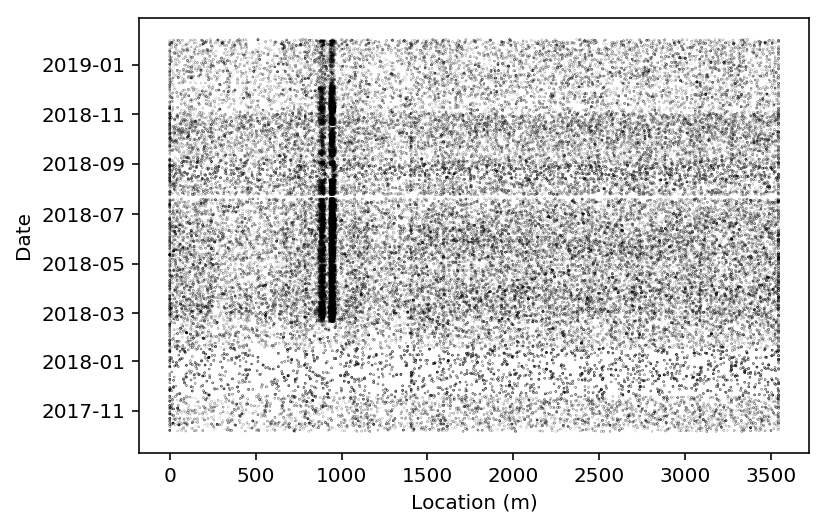

In [41]:
plot.draw_location_time_scatter(circ,dot_size_to_charge_ratio=1e6)

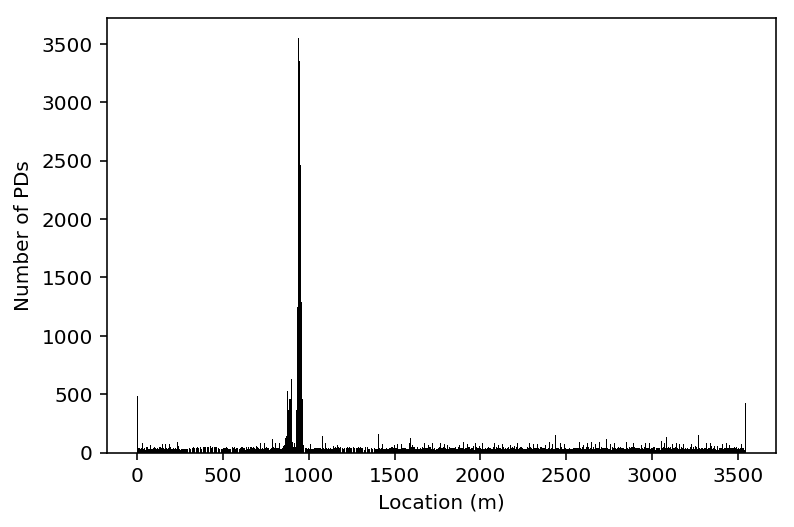

In [42]:
plot.draw_location_hist(circ)

SyntaxError: unexpected EOF while parsing (<ipython-input-33-ce9cde68871f>, line 1)

In [45]:
from clusterizer import algorithms as algo
algo.clusterize_poisson(circ)

({864m to 904m, 928m to 968m},
 array([   0.,    4.,    8.,   12.,   16.,   20.,   24.,   28.,   32.,
          36.,   40.,   44.,   48.,   52.,   56.,   60.,   64.,   68.,
          72.,   76.,   80.,   84.,   88.,   92.,   96.,  100.,  104.,
         108.,  112.,  116.,  120.,  124.,  128.,  132.,  136.,  140.,
         144.,  148.,  152.,  156.,  160.,  164.,  168.,  172.,  176.,
         180.,  184.,  188.,  192.,  196.,  200.,  204.,  208.,  212.,
         216.,  220.,  224.,  228.,  232.,  236.,  240.,  244.,  248.,
         252.,  256.,  260.,  264.,  268.,  272.,  276.,  280.,  284.,
         288.,  292.,  296.,  300.,  304.,  308.,  312.,  316.,  320.,
         324.,  328.,  332.,  336.,  340.,  344.,  348.,  352.,  356.,
         360.,  364.,  368.,  372.,  376.,  380.,  384.,  388.,  392.,
         396.,  400.,  404.,  408.,  412.,  416.,  420.,  424.,  428.,
         432.,  436.,  440.,  444.,  448.,  452.,  456.,  460.,  464.,
         468.,  472.,  476.,  480.,  484.,  48